<a href="https://colab.research.google.com/github/BerginGit/DataScience/blob/main/EAN_TRAB_01_Humberto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>Aluno: Humberto Camara Marriel

>Matrícula: 2016102899

In [ ]:
!pip install openpyxl --upgrade

In [ ]:
!pip install pandas --upgrade

In [ ]:
from google.colab import files

arquivo = files.upload() #importando planilha

Saving tx_bruta_mort1.xlsx to tx_bruta_mort1.xlsx


In [ ]:
nome=list(arquivo.keys())[0]  # IMPRIME O NOME DO ARQUIVO IMPORTADO (.XLSX)
nome

'tx_bruta_mort1.xlsx'

In [ ]:
import io  # IO serve para lidar com vários tipos de E/S.
import pandas as pd
df = pd.read_excel(io.BytesIO(arquivo[nome])) #TRANSFORMA PLANILHA EM DATA FRAME 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics as st
import math as mat

In [ ]:
print(df)
df_mun_2021 = df[['Município','2021']]      # CRIA UM DATAFRAME COM 2 COLUNAS MUNICÍPIO E ANO (2021)   
df_mun_2021.columns =['Município','taxa']   # TROCA DE NOME DA COLUNA 2021 PARA taxa
df_mun_2021.head()
with pd.option_context('display.max_rows',10,'display.max_columns',2): 
     print(df_mun_2021)
df_mun_2021.shape      # DIMENSÕES DO DATAFRAME (92.2)

             Município      2000      2001      2002      2003      2004  \
0       Angra dos Reis  4.688409  5.494377  5.456208  4.961169  4.921486   
1              Aperibé  6.461051  8.035925  7.586207  5.600358  6.336720   
2             Araruama  6.645656  6.816687  6.897080  6.695695  7.772473   
3                Areal  5.726698  5.336697  6.972968  5.740636  7.142195   
4   Armação dos Búzios  5.959732  4.814271  4.288330  5.061427  5.418741   
..                 ...       ...       ...       ...       ...       ...   
87           Três Rios  7.156534  7.823862  8.124866  7.959565  8.060905   
88             Valença  7.591392  7.857112  8.717563  8.087337  8.351623   
89           Varre-Sai  8.088601  4.376368  5.951672  5.484887  6.525472   
90           Vassouras  9.355380  8.211847  9.169002  9.961061  7.868362   
91       Volta Redonda  6.690705  6.418506  6.635547  6.649726  6.904230   

        2005      2006      2007      2008  ...      2013      2014      2015  \
0   5.

(92, 2)

Crie uma rotina para classificar a taxa_mort_2021 dos municípios em 4 categorias correspondentes aos quartis. Adicione esse indicador a última coluna do Data Frame original.

In [ ]:
#definir 3 quartis
q1 = df_mun_2021['taxa'].quantile(q=0.25)
q2 = df_mun_2021['taxa'].quantile(q=0.50)
q3 = df_mun_2021['taxa'].quantile(q=0.75)
print("Q1:{:.4f}".format(q1))
print("Q2:{:.4f}".format(q2))
print("Q3:{:.4f}".format(q3))

Q1:9.0482
Q2:10.0903
Q3:11.2860


In [ ]:
#verificar comprimento de municipios
n = len(df_mun_2021.taxa)
print(n)

92


In [ ]:
#criar e classificar em 4 categorias(0-25%,25-50%,50-75%,75-100%)
for i in df_mun_2021.index:
  #print(i)
  if(df_mun_2021.loc[i,'taxa']) < q1:
    #print(df_mun_2021.loc[i,'taxa'])
    df_mun_2021.loc[i,'ind']=1
  else:
    if(df_mun_2021.loc[i,'taxa']) < q2:
      #print(df_mun_2021.loc[i,'taxa'])
      df_mun_2021.loc[i,'ind']=2
    else:
        if(df_mun_2021.loc[i,'taxa']) < q3:
          #print(df_mun_2021.loc[i,'taxa'])
          df_mun_2021.loc[i,'ind']=3
        else:
          #print(df_mun_2021.loc[i,'taxa'])
          df_mun_2021.loc[i,'ind']=4

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
#eu quiz verificar indices criados com um head ate aparecer pelo menos 1 de cada categoria
df_mun_2021.head(16)

,Município,taxa,ind
0,Angra dos Reis,6.380286,1.0
1,Aperibé,9.410974,2.0
2,Araruama,10.998339,3.0
3,Areal,10.498066,3.0
4,Armação dos Búzios,9.571598,2.0
5,Arraial do Cabo,10.982905,3.0
6,Barra do Piraí,10.896749,3.0
7,Barra Mansa,10.712373,3.0
8,Belford Roxo,8.563332,1.0
9,Bom Jardim,9.994206,2.0


Gere indicadores numéricos e gráficos que permitam avaliar a distribuição desse indicador. 

(array([23.,  0.,  0., 23.,  0.,  0., 23.,  0.,  0., 23.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

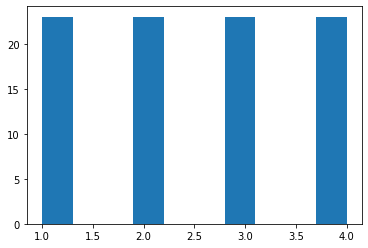

In [ ]:
#como dividimos em 3 quartis, sendo quatro partes iguais de 25% em cada, temos 23 em cada categoria, sendo assim, os 92 do total categorizados
plt.hist(df_mun_2021['ind'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fbb7d1e4410>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbb7d169490>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbb7d1704d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbb7d169f50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbb7d1e49d0>,
  <matplotlib.lines.Line2D at 0x7fbb7d1e4f10>]}

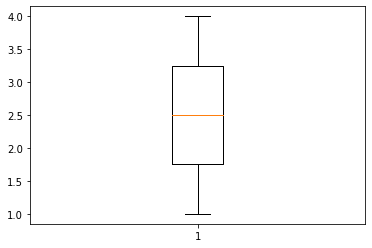

In [ ]:
#como esta simetricamente dividido em partes iguais, o boxplot em relacao ao indice tambem estará.
plt.boxplot(df_mun_2021['ind'])

BP(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb7d163dd0>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7fbb7d123610>, <matplotlib.lines.Line2D object at 0x7fbb7d123b50>], 'caps': [<matplotlib.lines.Line2D object at 0x7fbb7d0aa0d0>, <matplotlib.lines.Line2D object at 0x7fbb7d0aa610>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fbb7d11bfd0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fbb7d0aab90>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fbb7d0b3110>], 'means': []})

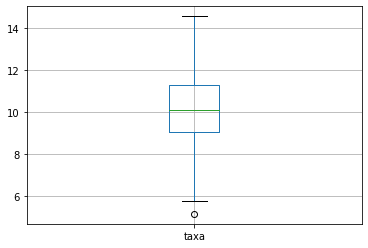

In [ ]:
#agora, ao analisar o boxplot em relacao as taxas de cada municipio, podemos observar um municipio que ultrapassou o limite inferior.
df_mun_2021.boxplot(column=['taxa'], return_type = 'both')

In [ ]:
#procurando outlier fora do limite inferior
iqr = q3-q1
for i in df_mun_2021.index:
  if(df_mun_2021.loc[i,'taxa']) < (q1 - 1.5*(iqr)):
    print(i)

89


In [ ]:
#como sabemos que o 89 é um outlier, Varre-Sai teria uma taxa abaixo do limite inferior
df_mun_2021.tail(3)

,Município,taxa,ind
89,Varre-Sai,5.132361,1.0
90,Vassouras,12.593372,4.0
91,Volta Redonda,11.307065,4.0


In [ ]:
#dataframe final
print(df_mun_2021)

             Município       taxa  ind
0       Angra dos Reis   6.380286  1.0
1              Aperibé   9.410974  2.0
2             Araruama  10.998339  3.0
3                Areal  10.498066  3.0
4   Armação dos Búzios   9.571598  2.0
..                 ...        ...  ...
87           Três Rios  11.041854  3.0
88             Valença  11.278929  3.0
89           Varre-Sai   5.132361  1.0
90           Vassouras  12.593372  4.0
91       Volta Redonda  11.307065  4.0

[92 rows x 3 columns]
